##### QFileDialog 選擇檔案對話視窗
QFileDialog 是 PyQt5 裡負責選擇檔案的對話視窗元件，通常會搭配按鈕或選單進行開啟檔案的動作，\
這篇教學會介紹如何在 PyQt5 視窗裡加入 QFileDialog 選擇檔案對話視窗，最後還會使用內建函式 open 搭配 QPlainTextEdit 顯示開啟檔案的內容。

##### 使用 QFileDialog 選擇檔案對話視窗 
建立 PyQt5 視窗物件後，先透過 QtWidgets.QPushButton(widget) 方法加入按鈕，使用 clicked.connect() 綁定點擊按鈕時的函式，\
在函式中使用 QtWidgets.QFileDialog.getOpenFileNames() 方法，就可以在點擊按鈕時，開啟選擇檔案的對話視窗，選擇並選擇檔案後，會回傳兩個值，\
第一個值是檔案的路徑，第二個值則是檔案篩選器的類型 ( 預設是 All Files )。

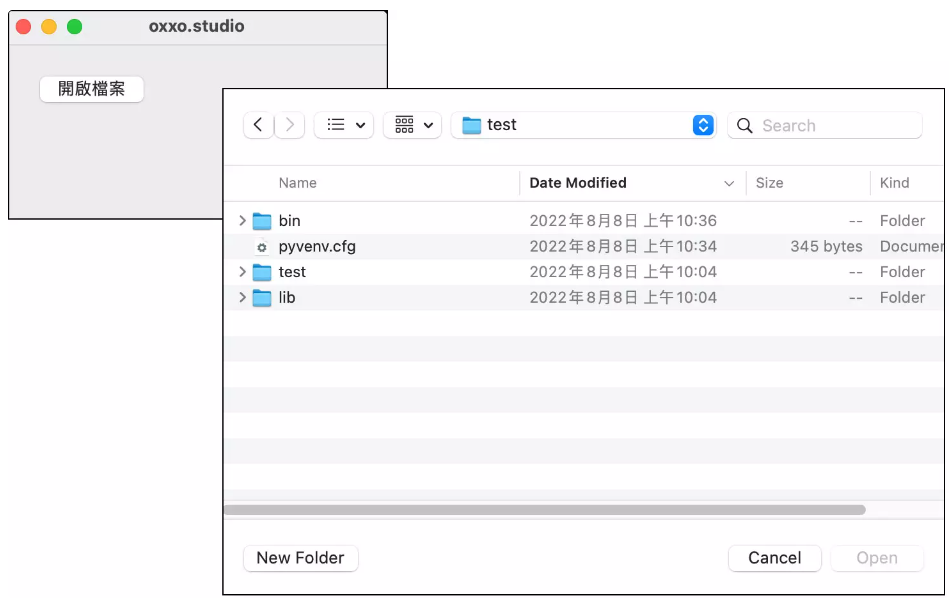

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

def open():
    filePath , filterType = QtWidgets.QFileDialog.getOpenFileNames()  # 選擇檔案對話視窗
    print(filePath , filterType)

btn = QtWidgets.QPushButton(Form)  # 加入按鈕
btn.move(20, 20)
btn.setText('開啟檔案')
btn.clicked.connect(open)

Form.show()
sys.exit(app.exec_())

##### QFileDialog 選擇檔案的方法 
使用 QFileDialog 可以透過三種方式選擇檔案：

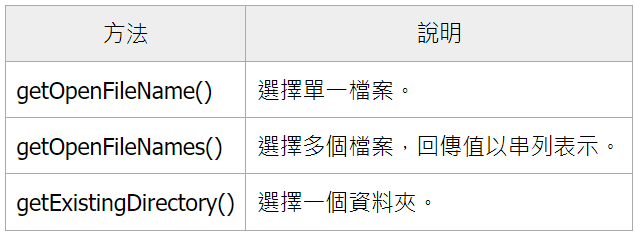

下方的程式碼執行後，會在畫面中放入兩個按鈕，其中一個可以選取多個檔案，另外一個可以選取指定的資料夾。

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

def openFiles():
    filePath, filterType = QtWidgets.QFileDialog.getOpenFileNames()  # 選取多個檔案
    print(filePath, filterType )

def openFolder():
    folderPath = QtWidgets.QFileDialog.getExistingDirectory()        # 選取特定資料夾
    print(folderPath)

btn1 = QtWidgets.QPushButton(Form)
btn1.move(20, 20)
btn1.setText('開啟檔案')
btn1.clicked.connect(openFiles)

btn2 = QtWidgets.QPushButton(Form)
btn2.move(140, 20)
btn2.setText('開啟資料夾')
btn2.clicked.connect(openFolder)

Form.show()
sys.exit(app.exec_())

##### QFileDialog 參數設定 
使用 QFileDialog 開啟檔案時，可以設定四個參數：

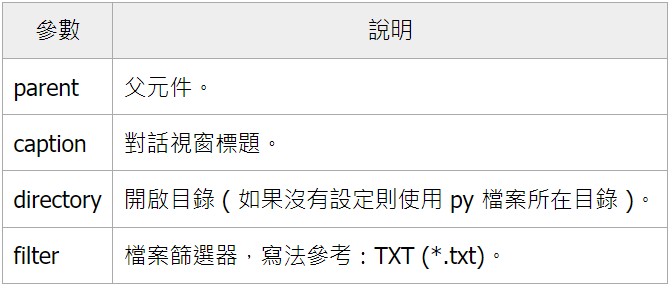

下方的程式碼執行後，對話視窗會開啟 test 資料夾，並限定只能選擇 txt 檔案。

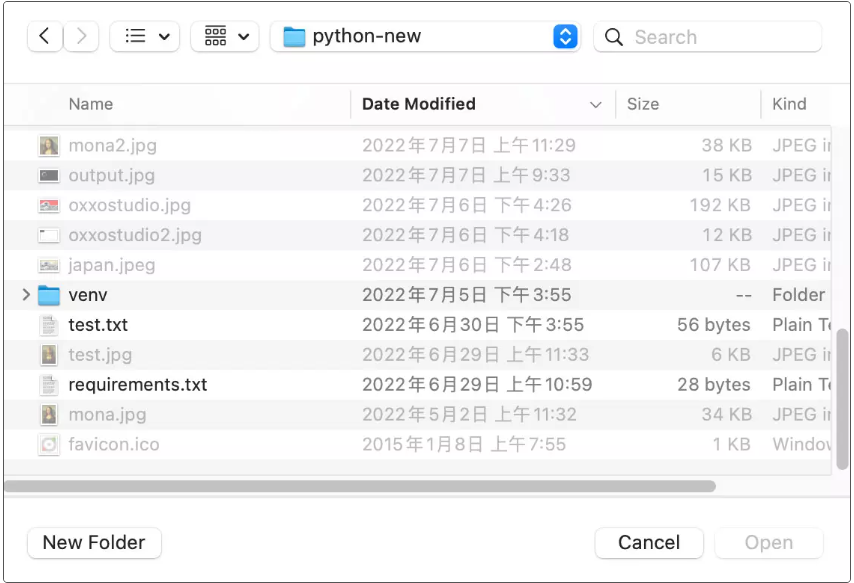

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

def open():
    filename , filetype = QtWidgets.QFileDialog.getOpenFileNames(directory=r'C:\Users\cgiks\Desktop\Thesis\PyQt5', filter='TXT (*.ipynb)')
    print(filename, filetype)

btn = QtWidgets.QPushButton(Form)
btn.move(20, 20)
btn.setText('開啟檔案')
btn.clicked.connect(open)

Form.show()
sys.exit(app.exec_())

##### 開啟 txt 檔案並顯示內容 
能夠取得檔案路徑後，就能透過 open 內建函式開啟檔案，並搭配 QPlainTextEdit 多行輸入框元件顯示開啟的檔案內容。

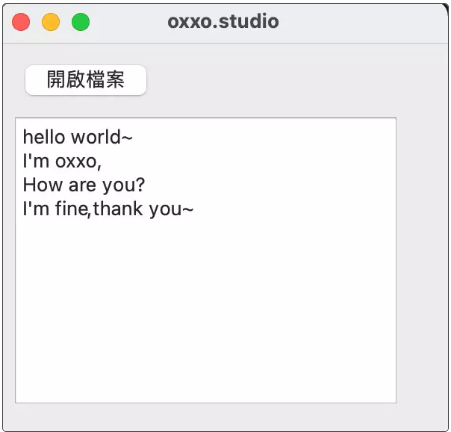

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 300)

def show():
    filePath , filetype = QtWidgets.QFileDialog.getOpenFileName(filter='TXT (*.txt)')
    file = open(filePath,'r')      # 根據檔案路徑開啟檔案
    text = file.read()             # 讀取檔案內容
    input.setPlainText(text)       # 設定變數為檔案內容
    file.close()                   # 關閉檔案

input = QtWidgets.QPlainTextEdit(Form)  # 放入多行輸入框
input.move(10,50)

btn = QtWidgets.QPushButton(Form)
btn.move(10, 10)
btn.setText('開啟檔案')
btn.clicked.connect(show)

Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示。

In [ ]:
# 從 PyQt5 包中導入 QtWidgets 模塊，包含了一系列用於構建圖形用戶界面元件的工具。
from PyQt5 import QtWidgets
# 導入 sys 模塊，用於 Python 腳本與 Python 解釋器的交互，例如處理命令行參數或系統退出。
import sys

# 定義一個 MyWidget 類，繼承自 QtWidgets.QWidget，這是 PyQt5 中所有用戶界面類的基礎。
class MyWidget(QtWidgets.QWidget):
    # 類的建構函數，初始化窗口及其屬性和行為。
    def __init__(self):
        # 調用父類的建構函數來進行基本的初始化。
        super().__init__()
        # 設置窗口的標題。
        self.setWindowTitle('oxxo.studio')
        # 設置窗口的大小。
        self.resize(300, 300)
        # 調用 ui 方法來構建用戶界面。
        self.ui()

    # 自定義的 ui 方法，用於添加和設置界面元件。
    def ui(self):
        # 創建一個 QPlainTextEdit 對象，用於多行文本的輸入和顯示。
        self.input = QtWidgets.QPlainTextEdit(self)
        # 設置多行文本框的位置。
        self.input.move(10, 50)

        # 創建一個 QPushButton 按鈕。
        self.btn = QtWidgets.QPushButton(self)
        # 設置按鈕的位置。
        self.btn.move(10, 10)
        # 設置按鈕顯示的文本。
        self.btn.setText('開啟檔案')
        # 將按鈕的 clicked 信號連接到 showMsg 方法，當按鈕被點擊時執行。
        self.btn.clicked.connect(self.showMsg)

    # 定義一個方法 showMsg，用於處理按鈕點擊事件。
    def showMsg(self):
        # 調用靜態方法 getOpenFileName 來打開一個文件選擇對話框，並過濾顯示僅 txt 文件。
        filePath, filetype = QtWidgets.QFileDialog.getOpenFileName(filter='TXT (*.txt)')
        # 打開選擇的文件並讀取內容。
        file = open(filePath, 'r')
        text = file.read()
        # 將讀取的文本設置到多行文本框中。
        self.input.setPlainText(text)
        # 關閉文件。
        file.close()

# 檢查當前腳本是否作為主程序運行。
if __name__ == '__main__':
    # 創建 QApplication 實例，這是 PyQt5 應用程序的開始。
    app = QtWidgets.QApplication(sys.argv)
    # 實例化 MyWidget 類。
    Form = MyWidget()
    # 顯示窗口。
    Form.show()
    # 啟動事件循環，等待用戶操作。
    sys.exit(app.exec_())